In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 피쳐 : ", X)

poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("2차 다항식 계수 피쳐",  poly_ftr)

일차 단항식 계수 피쳐 :  [[0 1]
 [2 3]]
2차 다항식 계수 피쳐 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [5]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 피쳐 : ", X)

y = polynomial_func(X)
print("3차 다항식 결정값",  y)

일차 단항식 계수 피쳐 :  [[0 1]
 [2 3]]
3차 다항식 결정값 [  5 125]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print("3차 다항식 계수 피쳐 \n",  poly_ftr)


# LinearRegression 에 3차 다항식 계수 피쳐와 3차다항식 결정값으로 학습 후 회귀 계수 확인

model = LinearRegression()
model.fit(poly_ftr,y)
print("polynomial 회귀 계수 \n ", np.round(model.coef_,2))
print("polynomial 회귀 shape : ", model.coef_.shape)

3차 다항식 계수 피쳐 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
polynomial 회귀 계수 
  [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
polynomial 회귀 shape :  (10,)


In [8]:
# 위 작업을 한 번에

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

#pipeline 객체로 streamline 하게 poly 변환과 linearRegression 연결

model = Pipeline([('poly',PolynomialFeatures(degree=3)), ('linear',LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print("poly 회귀 계수 : \n",np.round(model.named_steps['linear'].coef_,2))

poly 회귀 계수 : 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항회귀의 오버피팅 사례

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1



 degree 1 회귀 계수는 [-1.61] 이다.
degree 1 MSE는 0.40772896250986834 이다.

 degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 이다.
degree 4 MSE는 0.04320874987231747 이다.

 degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 이다.
degree 15 MSE는 182815433.47648773 이다.


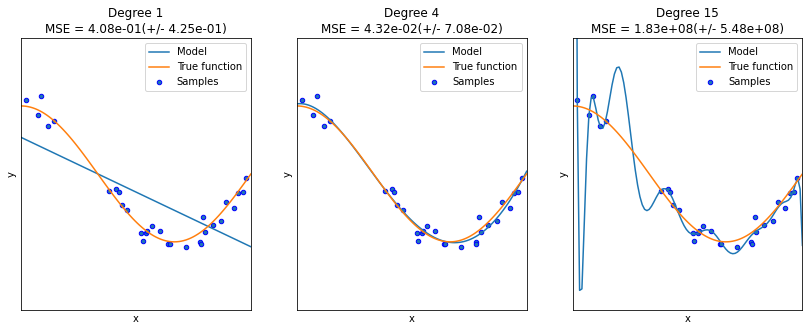

In [10]:
degrees = [1, 4, 15]


plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print("\n degree {0} 회귀 계수는 {1} 이다.".format(degrees[i], np.round(coefficients,2)))
    print("degree {0} MSE는 {1} 이다.".format(degrees[i], -1*np.mean(scores)))

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()